In [ ]:
!pip install biopython
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import csv
import numpy as np
import seaborn as sn
import matplotlib.ticker as tck
import os
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from IPython.core.display import struct
from Bio.PDB import PDBParser

In [147]:
%%shell

wd=$PWD
###
### things to change starts here ###

#names of the files
#file names are separated by a space! NO COMMAS
file_names=(RDF-SME-S-DCM.xvg)

### things to change ends here ###
###

for item in "${file_names[@]}"; do
    check_file="$item"
    file_name="$wd/$item"

    grep "@    title " $file_name > title.tmp
    sed -i 's/@    title //g' title.tmp
    sed -i 's/"//g' title.tmp
    titlename="$(grep '' title.tmp)"

    # grep -E '@ s[0-9] legend ' $file_name > parm.tmp
    grep -E '@ s(100|[1-9]?[0-9]) legend ' $file_name > parm.tmp
    lastline="$(tail -n 1 parm.tmp)"
    sed -n "/$lastline/,\$p" $file_name > data.tmp
    sed -i "1d" data.tmp

    sed -i 's/"//g' parm.tmp
    # sed -i 's/@ s[0-9] legend //g' parm.tmp
    sed -i 's/@ //g' parm.tmp
    sed -i 's/s[0-9]\+//g' parm.tmp
    sed -i 's/ legend //g' parm.tmp
    sed -i 's/ /-/g' parm.tmp

    if [[ "$titlename" == "Radial distribution" ]]; then
      grep "@ subtitle " $file_name > subtitle.tmp
      sed -i 's/@ subtitle //g' subtitle.tmp
      sed -i 's/reference //g' subtitle.tmp
      sed -i 's/"//g' subtitle.tmp
      sed -i 's/ /-/g' subtitle.tmp
      subtitlename="$(grep '' subtitle.tmp)"
      rm subtitle.tmp
    fi
    nParameters="$(grep -c -E '@ s(100|[1-9]?[0-9]) legend ' $file_name)"

    for ((i=1; i<$((nParameters+1)); i++))
    do
        PM="$(sed -n "${i}p" parm.tmp)"
        if [[ "$titlename" == "Radial distribution" ]]; then
          awk -F" " -v c2=$((i+1)) '{print $1","$c2}' data.tmp > REF-$subtitlename-TRG-$PM.csv
        else
          awk -F" " -v c2=$((i+1)) '{print $1","$c2}' data.tmp > $PM.csv
        fi
    done

    for k in "${!file_names[@]}"; do [[ "${file_names[$k]}" == $check_file ]] && echo "File ( "$((k+1))" ):" $check_file; done

    echo "# Parameters examined in the study: $nParameters"
    echo ""
    echo "Parameters:"
    cat parm.tmp
    echo ""
    rm parm.tmp
    rm data.tmp
    rm title.tmp
done

File ( 1 ): RDF-SME-S-DCM.xvg
# Parameters examined in the study: 5

Parameters:
resname-DCM-and-name-C1
resname-DCM-and-name-CL1
resname-DCM-and-name-CL2
resname-DCM-and-name-H1
resname-DCM-and-name-H2



*** Statistical Analysis : Temperature (K) ***

Sample Size (n) = 9996
Mean (x̄) =  298.11521317486995
Standard Deviation (s) =  1.2637007396528201
Standard Error (SE) =  0.012639535556480778

***

*** Statistical Analysis : Pressure (bar) ***

Sample Size (n) = 9996
Mean (x̄) =  0.008425673469387652
Standard Deviation (s) =  157.2265984935367
Standard Error (SE) =  1.5725805324997695

***

*** Statistical Analysis : Volume (nm³) ***

Sample Size (n) = 9996
Mean (x̄) =  929.5480962996198
Standard Deviation (s) =  3.1953217864501418
Standard Error (SE) =  0.03195961042590668

***

*** Statistical Analysis : Density (kg/m³) ***

Sample Size (n) = 9996
Mean (x̄) =  1270.3170487918164
Standard Deviation (s) =  4.36790537533186
Standard Error (SE) =  0.04368779218568638

***



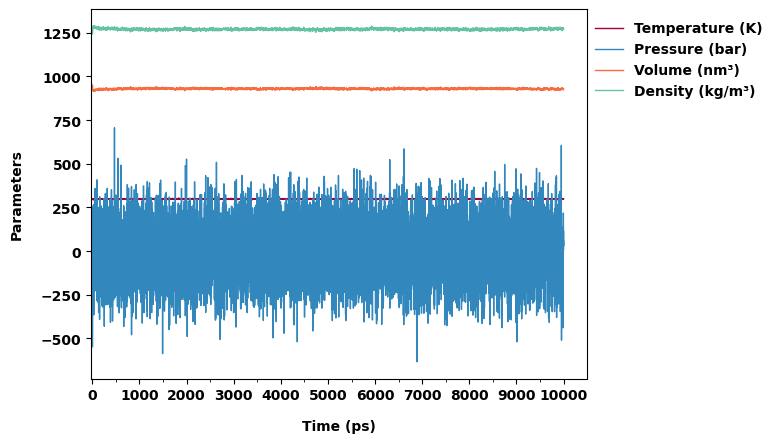

In [ ]:
###
### things to change starts here ###

#name the variables to analyze
Variables = ["Temperature","Pressure","Volume","Density"]

#color palettes
colorP=["#9e0142","#3288bd","#f46d43","#66c2a5","#e6f598","#5e4fa2","#d53e4f"]

#omit initial frames
oif=5

#units
parameter_units = {
    "Bond": "Bond Energy (kJ/mol)",
    "Angle": "Angle Energy (kJ/mol)",
    "LJ-14": "LJ (14) Energy (kJ/mol)",
    "LJ-(SR)": "LJ (Short Range) Energy (kJ/mol)",
    "Coulomb-14": "Coulomb (14) Energy (kJ/mol)",
    "Coulomb-(SR)": "Coulomb (Short Range) Energy (kJ/mol)",
    "Disper.-corr.": "Dispersion Correction Energy (kJ/mol)",
    "Coul.-recip.": "Coulomb (Reciprocal) Energy (kJ/mol)",
    "Kinetic-En.": "Kinetic Energy (kJ/mol)",
    "Potential": "Potential Energy (kJ/mol)",
    "Total-Energy": "Total Energy (kJ/mol)",
    "Conserved-En.": "Conserved Energy (kJ/mol)",
    "pV": "pV (kJ/mol)",
    "Enthalpy": "Enthalpy (kJ/mol)",
    "Temperature": "Temperature (K)",
    "Pressure": "Pressure (bar)",
    "Volume": "Volume (nm³)",
    "Density": "Density (kg/m³)",
    "Box-X": "Box-X (nm)",
    "Box-Y": "Box-Y (nm)",
    "Box-Z": "Box-Z (nm)"
}

### things to change ends here ###
###

fig, ax = plt.subplots()

label_nameL = 0

for i in range(len(Variables)):
    parameterV = []
    nsteps = []

    file_name = Variables[i] + ".csv"

    if oif >= 1:
      !mv "$file_name" "$file_name".tmp.csv
      !cp "$file_name".tmp.csv "$file_name"
      !sed -i "1,{oif}d" "$file_name"

    ## Statistical Analysis ###
    df = pd.read_csv(file_name, header=None)
    dfvalues = df.iloc[:,1]

    print("*** Statistical Analysis : "+parameter_units[Variables[i]]+" ***")
    print("")

    print("Sample Size (n) =",len(dfvalues))
    mean_value = dfvalues.mean()
    print("Mean (x̄) = ",mean_value)
    stdV = dfvalues.std(ddof=1)
    print("Standard Deviation (s) = ",stdV)
    sem = stdV / np.sqrt(len(dfvalues))
    print("Standard Error (SE) = ",sem)
    print("")
    print("***")
    print("")
    ###

    with open(file_name, 'r') as datafile:
      plotting = csv.reader(datafile, delimiter=',')

      for rows in plotting:
        parameterV.append(float(rows[1]))
        nsteps.append(float(rows[0]))
    datafile.close()
    parameterV = np.array(parameterV)
    nsteps = np.array(nsteps)

    label_name=parameter_units[Variables[i]]
    ax.plot(nsteps,parameterV,label=label_name, linewidth = '1.0', color=colorP[i])

    if label_nameL < len(label_name):
      label_nameL = len(label_name)

    if oif >= 1:
      !rm "$file_name"
      !mv "$file_name".tmp.csv "$file_name"

legend_properties = {'weight': 'bold', 'size':10.0}

plt.xlabel('Time (ps)', weight='bold', labelpad=12.0)

if len(Variables) == 1:
  ylabelname=parameter_units[Variables[i]]
  outfile=Variables[0]+".png"
else:
  ylabelname="Parameters"
  plt.legend(loc='upper center' , ncol=1, bbox_to_anchor=(1.035+(label_nameL/100), 1.0), frameon=False, fontsize=12.0, prop=legend_properties)
  outfile="Parameters.png"

plt.ylabel(ylabelname, weight='bold', labelpad=12.0)

#if you need to change the range of the x and y axes, change the following two lines
plt.xlim(-25,)
#change the major tick locator
loc = plticker.MultipleLocator(base=1000)
ax.xaxis.set_major_locator(loc)
#change the minor tick locator
loc = plticker.MultipleLocator(base=500)
ax.xaxis.set_minor_locator(loc)

# plt.ylim(-0.05,2.3)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.savefig(outfile,dpi=1080,bbox_inches='tight')

PDB Title:  au42_sme32
Number of residues (n-res) = 8332

File ( 1 ): REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-C1.csv

Search for  Reference  Information:
Reference  Residue Name = SME
Reference  Atom Name = S

Search for  Target  Information:
Target  Residue Name = DCM
Target  Atom Name = C1

File ( 2 ): REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-CL1.csv

Search for  Reference  Information:
Reference  Residue Name = SME
Reference  Atom Name = S

Search for  Target  Information:
Target  Residue Name = DCM
Target  Atom Name = CL1

File ( 3 ): REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-CL2.csv

Search for  Reference  Information:
Reference  Residue Name = SME
Reference  Atom Name = S

Search for  Target  Information:
Target  Residue Name = DCM
Target  Atom Name = CL2

File ( 4 ): REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-H1.csv

Search for  Reference  Information:
Reference  Residue Name = SME
Reference  Atom Name = S

Search for  Target  Informatio

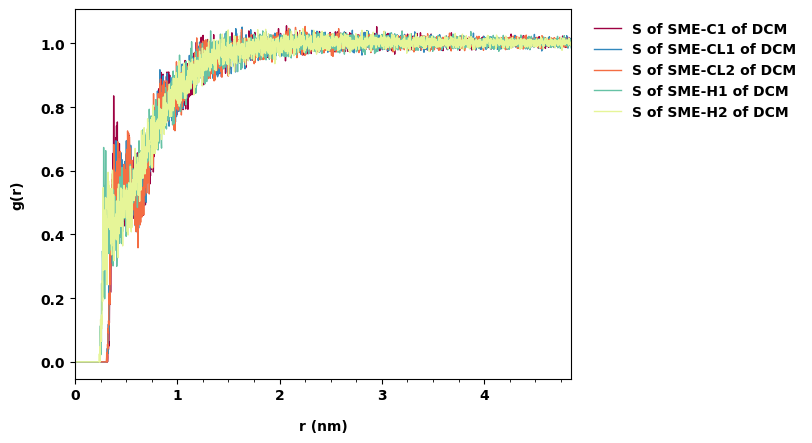

In [148]:
###
### things to change starts here ###

pdb_name = "md.pdb"
file_names = [
              "REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-C1.csv",
              "REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-CL1.csv",
              "REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-CL2.csv",
              "REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-H1.csv",
              "REF-resname-SME-and-name-S-TRG-resname-DCM-and-name-H2.csv"
              ]

#color palettes
colorP=["#9e0142","#3288bd","#f46d43","#66c2a5","#e6f598","#5e4fa2","#d53e4f"]

### things to change ends here ###
###

fig, ax = plt.subplots()

parser = PDBParser(QUIET=True)
structure = parser.get_structure("mystructure",pdb_name)

residue_ids = []
residuename = []

for model in structure:
  for chain in model:
    for residue in chain:
      #array of residue names
      residuename.append(residue.get_resname())
      #array of residue ids
      residue_ids.append(residue.get_id()[1])

#number of residues
num_residues = len(residue_ids)
#create a dictionary of {residueid:residuename}
residue_dict = dict(zip(residue_ids, residuename))
print("PDB Title: ", parser.get_header()["name"])
print("Number of residues (n-res) =", num_residues)
print("")

for i in range(len(file_names)):
  print("File (",i+1,"):",file_names[i])
  print("")

  info = file_names[i].split("-")
  info[len(info)-1] = info[len(info)-1].replace(".csv","")

  referenceINFO = info[:info.index("TRG")]
  targetINFO = info[info.index("TRG"):]

  targets = ["resname","resid","name","type","moltype"]
  target_type = ["Reference","Target"]

  for j in range(len(target_type)):
    print("Search for ",target_type[j]," Information:")

    if target_type[j] == "Reference":
      info = referenceINFO
      oldPlable = ""
    if target_type[j] == "Target":
      info = targetINFO
      oldPlable = Plable+"-"

    if len(info) > 2:
      for k in range(len(targets)):
        if targets[k] in info:
          idx = info.index(targets[k])

          #check if resname->
          if targets[k] == "resname":
            resName = info[idx+1]
            print(target_type[j]," Residue Name =", resName)
            Plable = oldPlable+resName

          #check if resid->
          if targets[k] == "resid":
            resID = info[idx+1]
            resName = residue_dict[int(resID)]
            print(target_type[j]," Residue Number =", resID)
            print(target_type[j]," Residue Name =", resName)
            Plable = oldPlable+resName+" ("+str(resID)+")"

          #check if name->
          if targets[k] == "name":
            resAtomName = info[idx+1]
            print(target_type[j]," Atom Name =", resAtomName)
            Plable = oldPlable+resAtomName+" of "+resName #+" ("+str(resID)+")"

          #check if type->
          #

          #check if moltype->
          #
      print("")
    else:
      #check reference ->
      if target_type[j] == "Reference":
        idx = info.index("REF")
        resName = info[idx+1]
        print("Reference Residue Name =", resName)
      if target_type[j] == "Target":
        idx = info.index("TRG")
        resName = info[idx+1]
        print("Targer Residue Name =", resName)
      Plable = oldPlable+resName
      print("")

  #plot the graphs
  parameterV = []
  nsteps = []

  with open(file_names[i], 'r') as datafile:
     plotting = csv.reader(datafile, delimiter=',')

     for rows in plotting:
       parameterV.append(float(rows[1]))
       nsteps.append(float(rows[0]))
  datafile.close()
  parameterV = np.array(parameterV)
  nsteps = np.array(nsteps)

  ax.plot(nsteps,parameterV,label=Plable, linewidth = '1.0', color=colorP[i])

legend_properties = {'weight': 'bold', 'size':10.0}
plt.ylabel('g(r)', weight='bold', labelpad=12.0)
plt.xlabel('r (nm)', weight='bold', labelpad=12.0)
plt.legend(loc='upper center' , ncol=1, bbox_to_anchor=(1.25, 1.0), frameon=False, fontsize=12.0, prop=legend_properties)

#if you need to change the range of the x and y axes, change the following two lines
plt.xlim(0,4.85)
#change the major tick locator
loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
#change the minor tick locator
loc = plticker.MultipleLocator(base=0.25)
ax.xaxis.set_minor_locator(loc)

# plt.ylim(-0.05,2.3)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.savefig("rdf.png",dpi=1080,bbox_inches='tight')